In [1]:
import requests
from tqdm import tqdm
from requests.auth import HTTPBasicAuth
from pprint import pprint
import pandas as pd
import numpy as np
from highlight_text import fig_text, ax_text
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
from matplotlib import rcParams
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib import cm

from PIL import Image
import urllib
import matplotlib.font_manager as fm
from highlight_text import fig_text

import os


In [8]:
df = pd.read_csv('../data/SerieA_22_23_match_shots.csv', index_col='Ind')
dflazio = df.query('home_team == "Lazio" or away_team == "Lazio"')

In [10]:
footMobId = {'Fiorentina': 8535,
 'Milan': 8564,
 'Atalanta': 8524,
 'Bologna': 9857,
 'Cremonese': 7801,
 'Empoli': 8534,
 'Hellas Verona': 9876,
 'Internazionale': 8636,
 'Juventus': 9885,
 'Lazio': 8543,
 'Lecce': 9888,
 'Monza': 6504,
 'Roma': 8686,
 'Napoli': 9875,
 'Salernitana': 6480,
 'Sampdoria': 9882,
 'Sassuolo': 7943,
 'Spezia': 9881,
 'Torino': 9804,
 'Udinese': 8600,
 'Genoa': 10233,
 'Cagliari': 8529,
 'Venezia': 7881,
 'Benevento': 6266,
 'Crotone': 9884,
 'Parma': 10167,
 'Brescia': 9858,
 'Spal': 8547}

ColorCode = {
 'Fiorentina': "#482E92",
 'Milan': "#FB090B",
 'Atalanta': "#1E71B8",
 'Bologna': "#1A2F48",
 'Cremonese': "#AD1919",
 'Empoli': "#00579C",
 'Hellas Verona': "#FFE74A",
 'Internazionale': "#005CA8",
 'Juventus': "#000000",
 'Lazio': "#87D8F7",
 'Lecce': "#ED1B23",
 'Monza': "#ED1B23",
 'Roma': "#F0BC42",
 'Napoli': "#003C82",
 'Salernitana': "#8A1E03",
 'Sampdoria': "#2345C0",
 'Sassuolo': "#00A752",
 'Spezia': "#000000",
 'Torino': "#8A1E03",
 'Udinese': "#000000"
}
FootMob_teams = pd.DataFrame([footMobId.keys(),footMobId.values()]).T
FootMob_teams = FootMob_teams.rename(columns={0:'team_name', 1:'team_id'})

dflazio_complete = pd.merge(FootMob_teams, dflazio, how='right', on='team_id' )

In [11]:
dflazio_complete.columns

Index(['team_name', 'team_id', 'match_id', 'match_round', 'league_id',
       'league_name', 'league_round_name', 'parent_league_id',
       'parent_league_season', 'match_time_utc', 'home_team_id', 'home_team',
       'home_team_color', 'away_team_id', 'away_team', 'away_team_color', 'id',
       'event_type', 'player_id', 'player_name', 'x', 'y', 'min', 'min_added',
       'is_blocked', 'is_on_target', 'blocked_x', 'blocked_y',
       'goal_crossed_y', 'goal_crossed_z', 'expected_goals',
       'expected_goals_on_target', 'shot_type', 'situation', 'period',
       'is_own_goal', 'on_goal_shot_x', 'on_goal_shot_y',
       'on_goal_shot_zoom_ratio', 'first_name', 'last_name', 'team_color'],
      dtype='object')

In [22]:
ev_loc = []

# SHOTS
for i,ev in dflazio_complete.iterrows():
  doc1 = {}
  doc1['matchId'] = ev['match_id']
  doc1['match'] = ev['home_team'] + " - " + ev['away_team']
  doc1['matchRound'] = ev['match_round']
  doc1['matchPeriod'] = ev['period']
  doc1['period'] = '1H' if (ev['period'] == 'FirstHalf') else '2H'
  doc1['min'] = ev['min']
  doc1['playerId'] = ev['player_id']
  doc1['player'] = ev['player_name']
  doc1['teamId'] = ev['team_id']
  doc1['teamName'] = ev['team_name']
  doc1['teamColor'] = ev['team_color']
  doc1['eventName'] = "shot"
  doc1['bodyPart'] = ev['shot_type']
  doc1['onTarget'] = ev['is_on_target']
  doc1['isGoal'] = True if (ev['event_type'] == 'Goal') else False
  doc1['isOwnGoal'] = ev['is_own_goal']
  doc1['situation'] = ev['situation']
  doc1['eventType'] = ev['event_type']
  doc1['xG'] = ev['expected_goals']
  doc1['PSxG'] = ev['expected_goals_on_target']
  doc1['x'] = ev['x']
  doc1['y'] = ev['y']
  doc1['venue'] = 'H' if (ev['team_name']==ev['home_team']) else 'A'

  ev_loc.append(doc1)

df_shots = pd.DataFrame(ev_loc)

In [23]:
font_path = "../assets/fonts"
for x in os.listdir(font_path):
    for y in os.listdir(f'{font_path}/{x}'):
        if y.split('.')[-1] == 'ttf':
            fm.fontManager.addfont(f'{font_path}/{x}/{y}')
            try:
                fm.FontProperties(weight=y.split('-')[-1].split('.')[0].lower(), fname=y)
            except Exception as e:
                print(f'Font {y} could not be added.')
                continue

rcParams['font.family'] = 'Karla'

Font DMSans-BoldItalic.ttf could not be added.
Font DMSans-Italic.ttf could not be added.
Font DMSans-MediumItalic.ttf could not be added.
Font Karla-BoldItalic.ttf could not be added.
Font Karla-ExtraBold.ttf could not be added.
Font Karla-ExtraBoldItalic.ttf could not be added.
Font Karla-ExtraLight.ttf could not be added.
Font Karla-ExtraLightItalic.ttf could not be added.
Font Karla-Italic.ttf could not be added.
Font Karla-MediumItalic.ttf could not be added.
Font Karla-SemiBoldItalic.ttf could not be added.


In [29]:
df_shots['min'] = df_shots['min'].astype(int)
df_shots['xG'] = df_shots['xG'].astype(float)

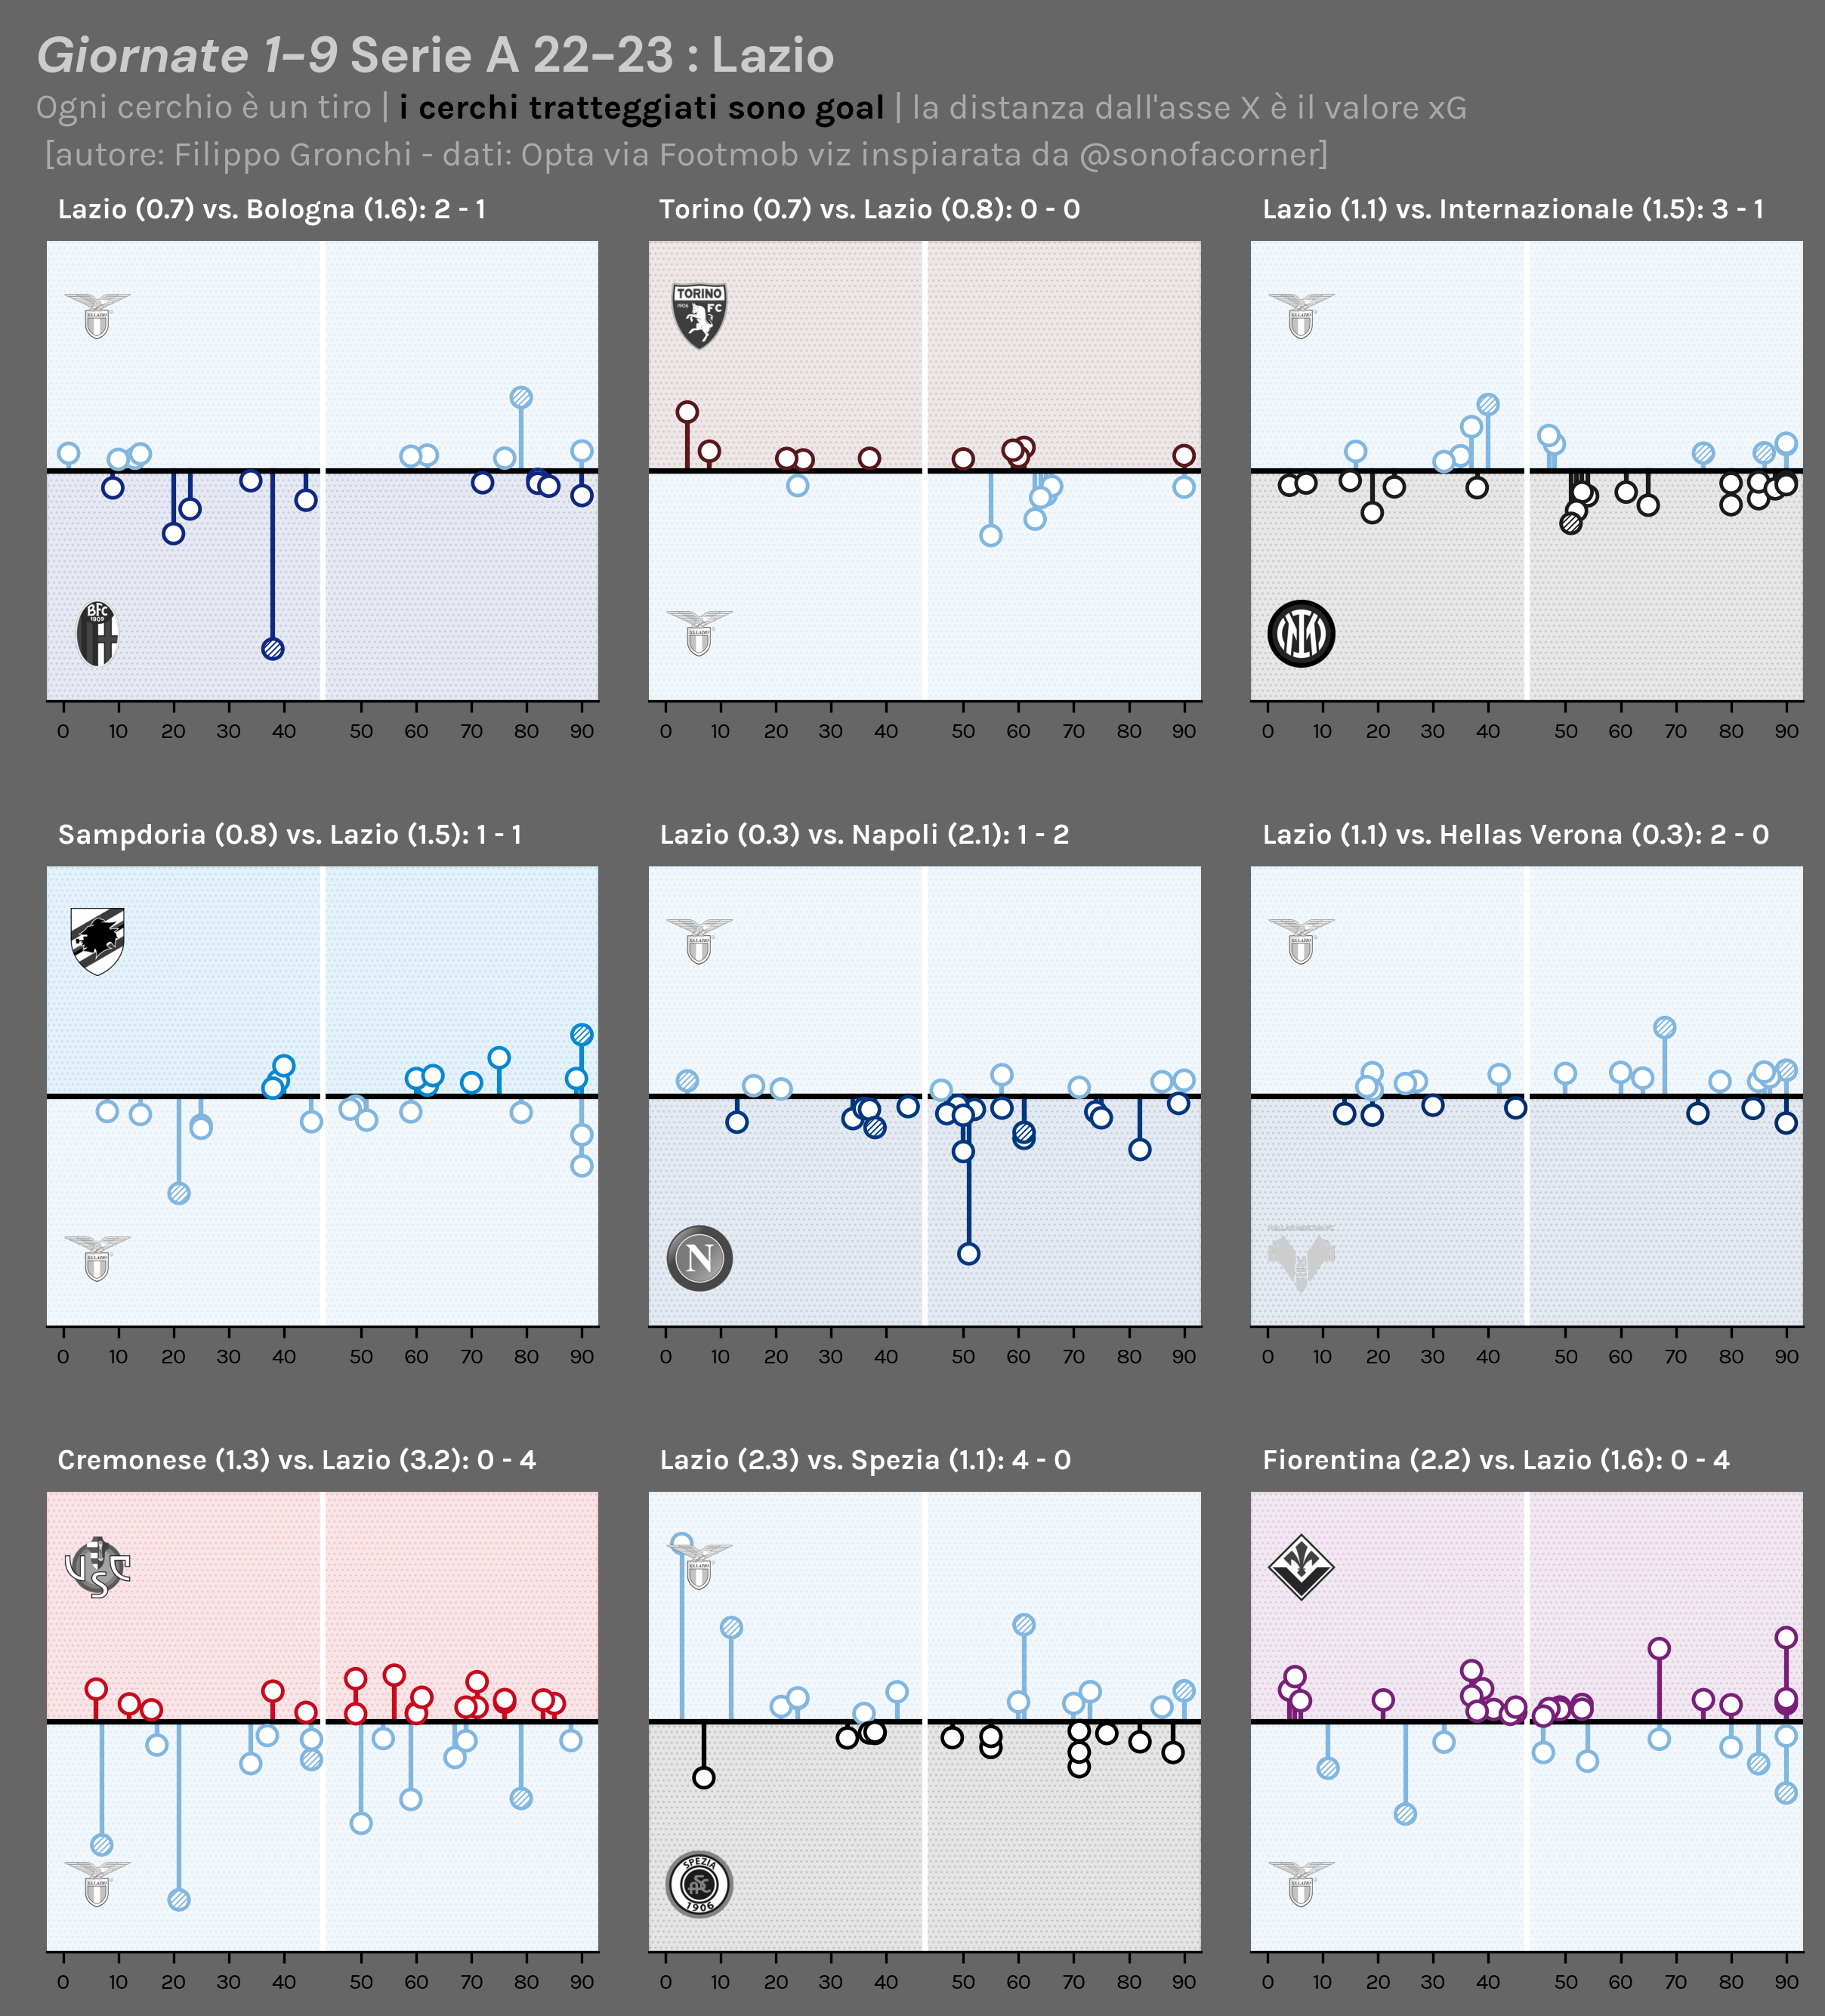

In [44]:
def plot_axes_xg_by_match(ax, fig, matchId, data=df_shots):
    '''
    This function plots the xG lollipop chart for a given match
    id.
    '''
    df = data.copy()
    match_df = df[df['matchId'] == matchId].reset_index(drop=True)
    match_df.sort_values(by='min', ascending=True).reset_index(drop=True)

    home_conditional = (match_df['venue'] == 'H')
    away_conditional = (match_df['venue'] == 'A')

    # -- Clean up the axes
    ax.set_ylim(-1.05,1.05)
    ax.set_xlim(-5,95)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks([])
    ax.xaxis.set_ticks(
        [x for x in range(-2,45,10)] + [x for x in range(52,102,10)],
        labels=[x for x in range(0,91,10)]
    )
    ax.tick_params(labelsize=7)

    plt.rcParams['hatch.linewidth'] = 0.45

    home_color = match_df[home_conditional]['teamColor'].iloc[0]
    for index, shot in enumerate(match_df[home_conditional]['xG']):
        minute = match_df[home_conditional]['min'].iloc[index]
        if minute < 46:
            offset_x = -2
        else:
            offset_x = 2
        ax.plot([minute + offset_x, minute + offset_x], [0, shot], color=home_color)
        if match_df[home_conditional]['eventType'].iloc[index] != 'Goal':
            hatch = ''
        else:
            hatch = '/////////////'
        ax.scatter([minute + offset_x], [shot + .025], marker='o', s=40, hatch=hatch, 
                color="white", zorder=3, lw=1.15, ec=home_color)

    away_color = match_df[away_conditional]['teamColor'].iloc[0]
    for index, shot in enumerate(match_df[away_conditional]['xG']):
        minute = match_df[away_conditional]['min'].iloc[index]
        if minute < 46:
            offset_x = -2
        else:
            offset_x = 2
        ax.plot([minute + offset_x, minute + offset_x], [0, -1*shot], color=away_color)
        if match_df[away_conditional]['eventType'].iloc[index] != 'Goal':
            hatch = ''
        else:
            hatch = '/////////////'
        ax.scatter([minute + offset_x], [-1*shot - .025], marker='o', s=40, hatch=hatch, 
                color="white", zorder=3, lw=1.15, ec=away_color)

    # --- Make it pretty ---
    ax.plot([-5,95], [0,0], color='black', lw=1.75)
    ax.plot([45,45], [-1.05,1.05], color='white', lw=1.75, zorder=2)
    ax.fill_between(
        x=[-5,95], y1=[0], y2=[1.05],
        color=home_color, alpha=0.1, zorder=1,
        hatch="......."
    )
    ax.fill_between(
        x=[-5,95], y1=[0], y2=[-1.05],
        color=away_color, alpha=0.1, zorder=1,
        hatch="......."
    )

    # --- Add the logos and legend ---
    home_team_id = match_df[home_conditional]['teamId'].iloc[0]
    away_team_id = match_df[away_conditional]['teamId'].iloc[0]
    home_team_name = match_df[home_conditional]['teamName'].iloc[0]
    away_team_name = match_df[away_conditional]['teamName'].iloc[0]

    DC_to_FC = ax.transData.transform
    FC_to_NFC = fig.transFigure.inverted().transform
    # Native data to normalized data coordinates
    DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'

    ax_coords = DC_to_NFC([-2, .55])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.03, 0.03], anchor = 'W')
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{home_team_id:.0f}.png')).convert("LA")
    logo_ax.imshow(club_icon)
    logo_ax.axis('off')

    ax_coords = DC_to_NFC([-2, -.9])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.03, 0.03], anchor = 'W')
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{away_team_id:.0f}.png')).convert("LA")
    logo_ax.imshow(club_icon)
    logo_ax.axis('off')

    # --- Compute goals and xG
    home_xG = match_df[home_conditional & (match_df['isOwnGoal'] == False)]['xG'].sum()
    away_xG = match_df[away_conditional & (match_df['isOwnGoal'] == False)]['xG'].sum()
    home_goals = (match_df[home_conditional & (match_df['isOwnGoal'] == False)]['eventType'] == 'Goal').sum() + (match_df[away_conditional & (match_df['isOwnGoal'] == True)]['eventType'] == 'Goal').sum()
    away_goals = (match_df[away_conditional & (match_df['isOwnGoal'] == False)]['eventType'] == 'Goal').sum() + (match_df[home_conditional & (match_df['isOwnGoal'] == True)]['eventType'] == 'Goal').sum()


    ax.annotate(
        xy=(0.02, 1.05),
        text=f'{home_team_name} ({home_xG:.1f}) vs. {away_team_name} ({away_xG:.1f}): {home_goals} - {away_goals}',
        xycoords='axes fraction',
        weight='bold',
        size=9,
        color = "white"
    )

    return ax


# --- The Final Visual

layout_ = '''
    AABBCC
    ......
    GGHHDD
    ......
    EEIIJJ
'''

height_ratios = [1,.05,1,.05,1]

f = plt.figure(figsize=(10,10), dpi=300, facecolor="#666666")
axs = f.subplot_mosaic(
    layout_, 
    gridspec_kw={
        'height_ratios':height_ratios,
        'hspace': 0.25
    }
)

counter = 0
df_shots = df_shots.sort_values(by='matchRound').reset_index(drop=True)
matches = list(df_shots['matchId'].unique())
for k, ax in axs.items():
    matchId = matches[counter]
    plot_axes_xg_by_match(ax, f, matchId=matchId, data=df_shots)
    counter += 1


fig_text(
    x = 0.12, y = .95, 
     s = "<Giornate 1-9> Serie A 22-23 : Lazio",
    highlight_textprops=[{"style":"italic"}],
    va = "bottom", ha = "left",
    fontsize = 16, color = "#cccccc", font = "DM Sans", weight = "bold"
)
fig_text(
	x = 0.12, y = .91, 
    s = "Ogni cerchio è un tiro | <i cerchi tratteggiati sono goal> | la distanza dall'asse X è il valore xG\n [autore: Filippo Gronchi - dati: Opta via Footmob viz inspiarata da @sonofacorner]",
    highlight_textprops=[{"weight": "bold", "color": "black"}],
	va = "bottom", ha = "left",
	fontsize = 11, color = "#aaaaaa", font = "Karla"
)

plt.savefig(
	"../figures/15102022_serieA_Lazio_XG_lollipop.png",
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)

plt.savefig(
	"../figures/15102022_serieA_Lazio_XG_lollipop_tr.png",
	dpi = 600,
	facecolor = "none",
	bbox_inches="tight",
    edgecolor="none",
	transparent = True
)